In [1]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn as sk
print('sklearn: {}'.format(sk.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

matplotlib: 3.3.4
pandas: 1.2.4
sklearn: 0.24.1
seaborn: 0.11.1


In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv("creditcardcsvpresent.csv")

In [4]:
df.shape

(3075, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [7]:
df.drop(['Transaction date','Merchant_id'], axis=1, inplace=True)

In [8]:
df.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [9]:
df.sample(5)

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
2157,12.116564,24.233127,N,0,N,N,0,0.0,0,N
2440,401.352848,6421.645566,N,6,N,N,0,0.0,0,N
221,263.283983,13954.051110,N,0,Y,Y,0,0.0,0,Y
1573,382.485130,3442.366172,N,0,N,N,0,0.0,0,N
2258,33.993000,169.965000,N,0,N,N,0,0.0,0,N


In [10]:
df.describe()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [12]:
#df.Merchant_id.count()

In [ ]:
#df.Merchant_id.nunique()

In [14]:
null_transaction = df[df.Transaction_amount == 0]

In [15]:
null_transaction.describe()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,91.000000,91.0,91.000000,91.000000,91.000000,91.000000
mean,512.254690,0.0,0.450549,38.373626,23.307692,0.186813
std,291.305624,0.0,1.249566,180.614300,118.143199,0.987838
min,19.999198,0.0,0.000000,0.000000,0.000000,0.000000
25%,295.011917,0.0,0.000000,0.000000,0.000000,0.000000
50%,442.745154,0.0,0.000000,0.000000,0.000000,0.000000
75%,791.099598,0.0,0.000000,0.000000,0.000000,0.000000
max,994.171111,0.0,6.000000,942.000000,843.000000,7.000000


In [16]:
df = df[df.Transaction_amount > 0]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Amount/transaction/day  2984 non-null   float64
 1   Transaction_amount              2984 non-null   float64
 2   Is declined                     2984 non-null   object 
 3   Total Number of declines/day    2984 non-null   int64  
 4   isForeignTransaction            2984 non-null   object 
 5   isHighRiskCountry               2984 non-null   object 
 6   Daily_chargeback_avg_amt        2984 non-null   int64  
 7   6_month_avg_chbk_amt            2984 non-null   float64
 8   6-month_chbk_freq               2984 non-null   int64  
 9   isFradulent                     2984 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 256.4+ KB


### Studying the target variable

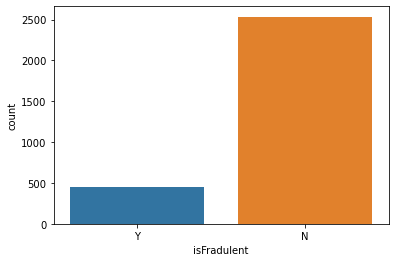

In [18]:
sns.countplot(x='isFradulent', data=df);

In [19]:
df.isFradulent.value_counts()

N    2536
Y     448
Name: isFradulent, dtype: int64

#### Only 17% of transactions are fraudulent, the dataset is unbalanced !

In [20]:
448/2627

0.1705367339170156

<AxesSubplot:ylabel='Frequency'>

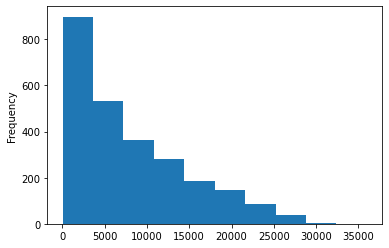

In [21]:
df[df['isFradulent'] == 'N'].Transaction_amount.plot.hist()

<AxesSubplot:ylabel='Frequency'>

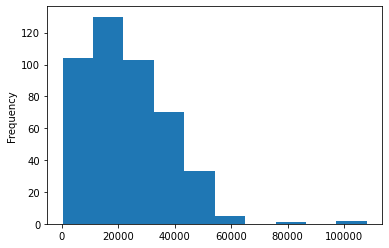

In [22]:
df[df['isFradulent'] == "Y"].Transaction_amount.plot.hist()

### Checking if there are missing values

In [23]:
pd.isnull(df).sum()

Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [ ]:
#### Studying the correlations between the target variable and the features
#### The target variable is categorical the features are either numerical or categorical

In [ ]:
#### Lets check the correlation between categorical variables and the target variable

#### Let's rename the columns

In [24]:
df.columns

Index(['Average Amount/transaction/day', 'Transaction_amount', 'Is declined',
       'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [27]:
df = df.rename(columns={'Is declined':'is_declined','Transaction_amount':'transaction_amount','Total Number of declines/day':'total_number_declines_per_day','isForeignTransaction':'is_foreign_transaction','isHighRiskCountry':'is_high_risk_country','isFradulent':'is_fraudulent','Transaction date':'transaction_date','Average Amount/transaction/day':'average_amount_transaction_day','Daily_chargeback_avg_amt':'daily_chargeback_avg_amt'})

In [28]:
df.columns

Index(['average_amount_transaction_day', 'transaction_amount', 'is_declined',
       'total_number_declines_per_day', 'is_foreign_transaction',
       'is_high_risk_country', 'daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'is_fraudulent'],
      dtype='object')

### Feature encoding 

In [29]:
df['is_fraudulent']=df['is_fraudulent'].replace('N',0)
df['is_fraudulent']=df['is_fraudulent'].replace('Y',1)

In [30]:
df['is_declined']=df['is_declined'].replace('N',0)
df['is_declined']=df['is_declined'].replace('Y',1)

In [31]:
df['is_foreign_transaction']=df['is_foreign_transaction'].replace('N',0)
df['is_foreign_transaction']=df['is_foreign_transaction'].replace('Y',1)

In [32]:
df['is_high_risk_country']=df['is_high_risk_country'].replace('N',0)
df['is_high_risk_country']=df['is_high_risk_country'].replace('Y',1)

In [33]:
df['is_fraudulent']=df['is_fraudulent'].replace('N',0)
df['is_fraudulent']=df['is_fraudulent'].replace('Y',1)

### Studying the correlations

<AxesSubplot:>

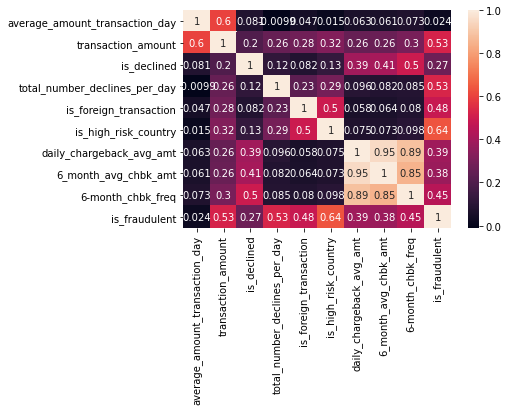

In [34]:
sns.heatmap(df.corr(),annot=True)

#### Given the correlation heatmap let's drop the average_amount_transaction_day 

In [36]:
df.drop(['average_amount_transaction_day'], axis=1, inplace=True)

In [ ]:
# Distribution of normal transactions amount

In [39]:
df.to_csv("df_clean2.csv",sep=',')